In [1]:
# Import Libararies
import pandas as pd
import numpy as np
import os
import plotly.express as px

In [2]:
# Get working directory
current_dir= os.getcwd()
# Go one directory up to the root directory
project_root_dir= os.path.dirname(current_dir)
project_root_dir
# Define paths to docs folder
data_dir= os.path.join(project_root_dir,'Data')
raw_dir= os.path.join(data_dir,'Raw')
processed_dir=os.path.join(data_dir,'Processed')
results_dir=os.path.join(project_root_dir,'Results')
docs_dir=os.path.join(project_root_dir,'Docs')
notebook_dir= os.path.join(project_root_dir,'Notebooks')

In [3]:
aircrash_data_filename= os.path.join(processed_dir,"Aircrash_file.csv")
df= pd.read_csv(aircrash_data_filename, na_values='?', skipinitialspace=True)
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Sum of Ground,Sum of Fatalities (air),Sum of Aboard,Month_num,Date
0,1908,Qtr 3,September,17,United States,Wright,Wright Flyer III,virginia,Army U.S. - Military,0,1,2,9,1908-09-17
1,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,france,Unknown,0,1,1,9,1909-09-07
2,1912,Qtr 3,July,12,Unknown,Unknown,Dirigible,atlantic,Navy U.S. - JerseyMilitary,0,5,5,7,1912-07-12
3,1913,Qtr 3,August,6,United Kingdom,Curtiss,Curtiss seaplane,victoria british,Canada Columbia Private,0,1,1,8,1913-08-06
4,1913,Qtr 3,September,9,Unknown,Zeppelin,Zeppelin L 1 (airship),over the north seamilitary - german navy,Unknown,0,14,20,9,1913-09-09


In [4]:
df.shape

(5030, 14)

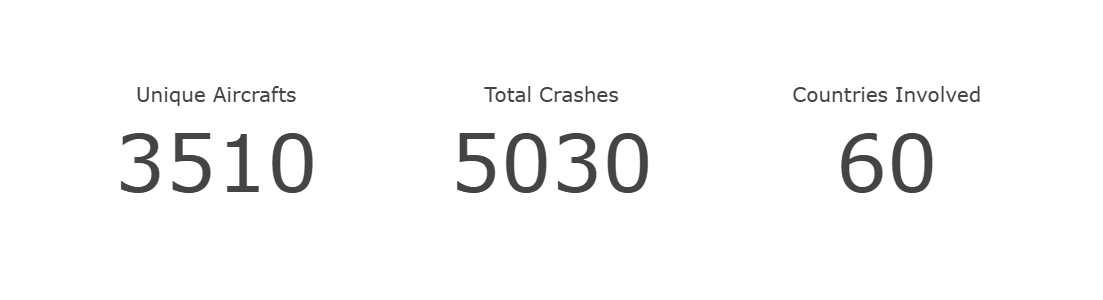

In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

aircrafts = df['Aircraft'].nunique()
crashes = len(df)
countries = df['Country/Region'].nunique()

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'indicator'}]*3])

fig.add_trace(go.Indicator(
    mode="number",
    value=aircrafts,
    title={"text": "Unique Aircrafts"}), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=crashes,
    title={"text": "Total Crashes"}), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=countries,
    title={"text": "Countries Involved"}), row=1, col=3)

fig.update_layout(height=300, width=900, template='presentation')
fig.update_layout(template= 'presentation',paper_bgcolor= "rgba(0,0,0,0)",plot_bgcolor = "rgba(0,0,0,0)")
fig.show()
fig.write_image(os.path.join(results_dir, 'Total Crashes.jpg'))
fig.write_image(os.path.join(results_dir, 'Total Crashes.png'))
fig.write_html(os.path.join(results_dir, 'Total Crashes.html'))


### Crashes over time

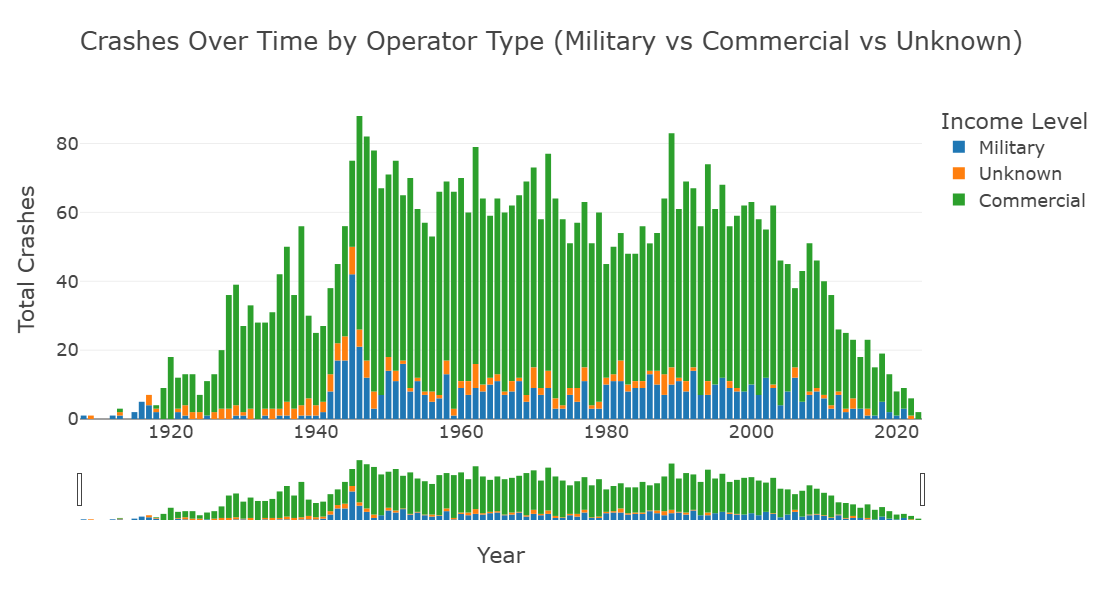

In [6]:
def classify_operator(op):
    if pd.isna(op) or op.strip().lower() in ['unknown', '', 'nan']:
        return 'Unknown'
    elif 'military' in op.lower() or 'army' in op.lower() or 'navy' in op.lower():
        return 'Military'
    else:
        return 'Commercial'

df['Operator Type'] = df['Operator'].apply(classify_operator)
crashes_by_operator = df.groupby(['Year', 'Operator Type']).size().reset_index(name='Total Crashes')

fig = px.bar(
    crashes_by_operator,
    x='Year',
    y='Total Crashes',
    color='Operator Type',
    title='Crashes Over Time by Operator Type (Military vs Commercial vs Unknown)',
    template='presentation',
    height=600
)

fig.update_layout(
    xaxis=dict(
        title='Year',
        rangeslider=dict(visible=True),
        type='linear'
    ),
    yaxis_title='Total Crashes',
    legend_title='Operator Type'
)
fig.update_layout(template = "presentation",xaxis_title="Year",
                  yaxis_title="Total Crashes",
                  legend_title=dict(text="Income Level"),
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()

fig.write_image(os.path.join(results_dir, 'Crashes Over Time by Operator Type (Military vs Commercial vs Unknown).jpg'))
fig.write_image(os.path.join(results_dir, 'Crashes Over Time by Operator Type (Military vs Commercial vs Unknown).png'))
fig.write_html(os.path.join(results_dir, 'Crashes Over Time by Operator Type (Military vs Commercial vs Unknown).html'))

In [7]:
df['Operator'].unique()

array(['Army U.S. - Military', 'Unknown', 'Navy U.S. - JerseyMilitary',
       ..., 'LATAM', 'SAS Aero', 'Aerotaxi Manaus'], dtype=object)

### Top aircraft types involved

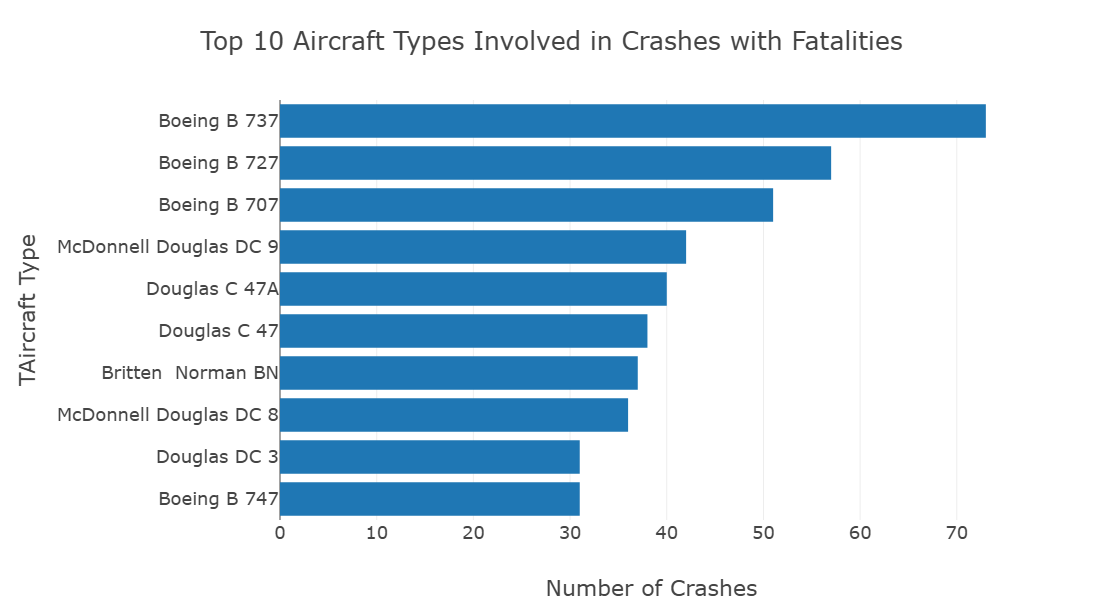

In [8]:
# Filter top 10 aircraft by number of crashes
top_aircrafts = df['Aircraft'].value_counts().nlargest(10).index
top_aircrafts_df = df[df['Aircraft'].isin(top_aircrafts)]

# Aggregate total crashes and total fatalities per aircraft
agg_data = top_aircrafts_df.groupby('Aircraft').agg(
    crash_count=('Aircraft', 'size'),
    total_fatalities=('Sum of Fatalities (air)', 'sum')
).reset_index()

# plot
fig = px.bar(
    agg_data.sort_values('crash_count'),
    x='crash_count',
    y='Aircraft',
    orientation='h',
    title='Top 10 Aircraft Types Involved in Crashes with Fatalities',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'crash_count': 'Number of Crashes',
        'total_fatalities': 'Total Fatalities'
    }
)

fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Number of Crashes',
)
fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Number of Crashes',
    margin=dict(l=280) 
)
fig.update_layout(template = "presentation",xaxis_title="Number of Crashes",
                  yaxis_title="TAircraft Type",
                  legend_title=dict(text="Income Level"),
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()

fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types Involved in Crashes with Fatalities.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types Involved in Crashes with Fatalities.png'))
fig.write_html(os.path.join(results_dir, 'Top 10 Aircraft Types Involved in Crashes with Fatalities.html'))

### Aircraft manufacturers breakdown

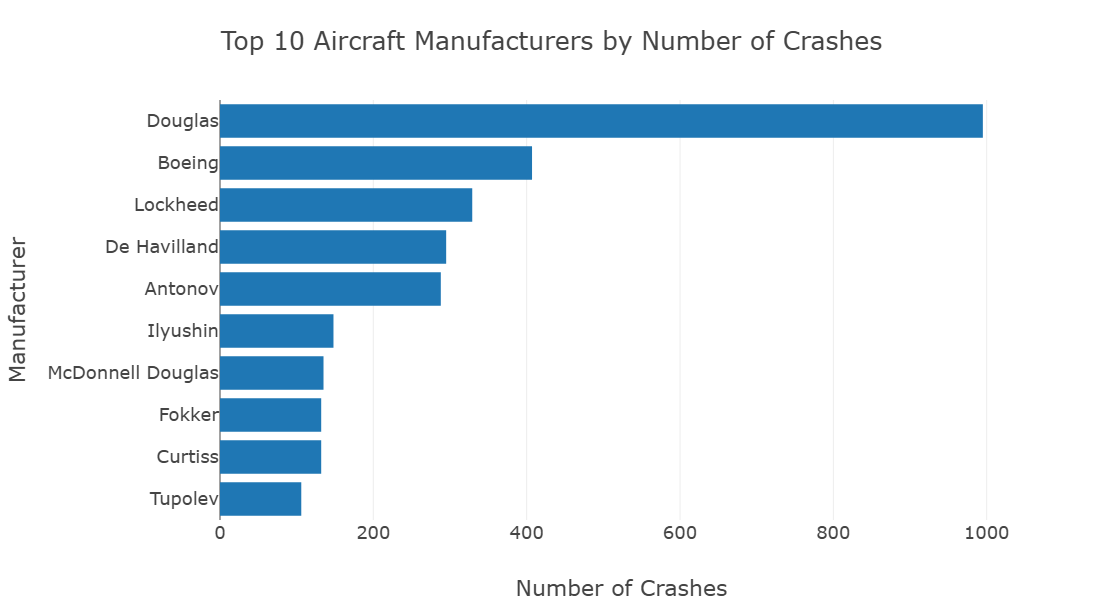

In [9]:

top_makers = df['Aircraft Manufacturer'].value_counts().nlargest(10).index

top_makers_df = df[df['Aircraft Manufacturer'].isin(top_makers)]
agg_manufacturer = top_makers_df.groupby('Aircraft Manufacturer').agg(
    crash_count=('Aircraft Manufacturer', 'size'),
    total_fatalities=('Sum of Fatalities (air)', 'sum')
).reset_index()


fig = px.bar(
    agg_manufacturer.sort_values('crash_count'),
    x='crash_count',
    y='Aircraft Manufacturer',
    orientation='h',
    title='Top 10 Aircraft Manufacturers by Number of Crashes',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'crash_count': 'Number of Crashes',
        'total_fatalities': 'Total Fatalities',
        'Aircraft Manufacturer': 'Manufacturer'
    }
)


fig.update_layout(
    yaxis_title='Manufacturer',
    xaxis_title='Number of Crashes',
    margin=dict(l=220) 
)
fig.update_layout(template = "presentation",xaxis_title="Number of Crashes",
                  yaxis_title="Manufacturer",
                  legend_title=dict(text="Income Level"),
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()

fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Manufacturers by Number of Crashes.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Manufacturers by Number of Crashes.png'))
fig.write_html(os.path.join(results_dir, 'Top 10 Aircraft Manufacturers by Number of Crashes.html'))


### Fatalities vs Aircraft Types (Top 10 by Fatalities)

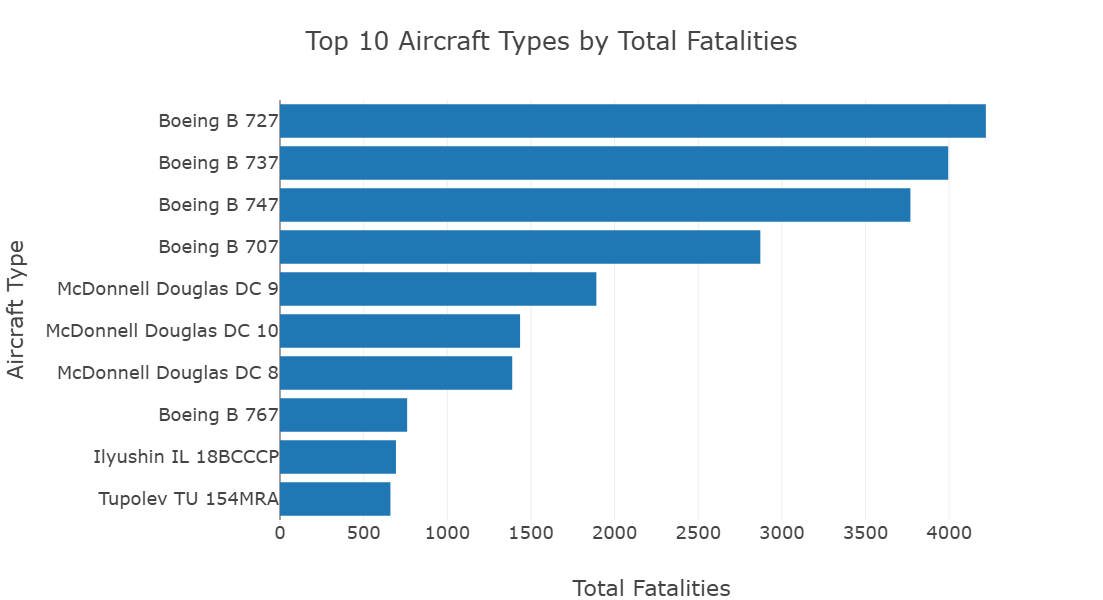

In [10]:
fatalities_by_aircraft = df.groupby('Aircraft').agg(
    total_fatalities=('Sum of Fatalities (air)', 'sum'),
    crash_count=('Aircraft', 'size')
).reset_index()


top_fatal_aircraft = fatalities_by_aircraft.nlargest(10, 'total_fatalities')


fig = px.bar(
    top_fatal_aircraft.sort_values('total_fatalities'),
    x='total_fatalities',
    y='Aircraft',
    orientation='h',
    title='Top 10 Aircraft Types by Total Fatalities',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'total_fatalities': 'Total Fatalities',
        'crash_count': 'Number of Crashes',
        'Aircraft': 'Aircraft Type'
    }
)


fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Total Fatalities',
    margin=dict(l=280)
)
fig.update_layout(template = "presentation",xaxis_title="Total Fatalities",
                  yaxis_title="Aircraft Type",
                  legend_title=dict(text="Income Level"),
                  xaxis_title_standoff=50,
                  paper_bgcolor = "rgba(0, 0, 0, 0)",
                  plot_bgcolor = "rgba(0, 0, 0, 0)"
                 )
fig.show()
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types by Total Fatalities.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 10 Aircraft Types by Total Fatalities.png'))
fig.write_html(os.path.join(results_dir, 'Top 10 Aircraft Types by Total Fatalities.html'))


### Map of crash locations

In [13]:

# import time
# import json
# from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderTimedOut, GeocoderServiceError

# geolocator = Nominatim(user_agent="aircrash_mapper")

# # Load cache if exists
# cache_file = 'geocoded_locations.json'
# if os.path.exists(cache_file):
#     with open(cache_file, 'r') as f:
#         location_coords = json.load(f)
# else:
#     location_coords = {}

# # Get all unique locations from the dataset
# unique_locations = df['Location'].dropna().unique()

# # Loop through unique locations
# for loc in unique_locations:
#     if loc in location_coords:
#         continue  # already geocoded

#     try:
#         location = geolocator.geocode(loc, timeout=10)
#         if location:
#             location_coords[loc] = {'lat': location.latitude, 'lon': location.longitude}
#             print(f"Geocoded: {loc} ✅")
#         else:
#             location_coords[loc] = {'lat': None, 'lon': None}
#             print(f"Not found: {loc} ❌")

#     except (GeocoderTimedOut, GeocoderServiceError) as e:
#         print(f"Timeout/Error on {loc}: {e}")
#         location_coords[loc] = {'lat': None, 'lon': None}

#     # Wait between requests to respect rate limits
#     time.sleep(2)

#     # Save progress every time
#     with open(cache_file, 'w') as f:
#         json.dump(location_coords, f)

# print("✅ All locations processed.")


Geocoded: miraflores colombia ✅
Not found: off mbour senegal ❌
Not found: near palmerston north new ❌
Geocoded: volgograd russia ✅
Not found: herputchi russia ❌
Not found: near cuvela angola ❌
Not found: la romana dominican ❌
Geocoded: kiunga papua ✅
Not found: gumey papua ❌
Geocoded: bintuni ✅
Not found: near antananivo madagascar ❌
Not found: near karamui papua ❌
Geocoded: johannesburg south ✅
Not found: near kaimana indonesia ❌
Geocoded: mt. chichontepec san ✅
Not found: nevada del huila colombia ❌
Not found: near carrollton georgia ❌
Not found: near farewell alaska ❌
Geocoded: beaver dam arizona ✅
Geocoded: toronto ontario ✅
Not found: near la macarena colombia ❌
Geocoded: jalalabad afghanistan ✅
Not found: off colombo sri ❌
Geocoded: tawau ✅
Not found: near moron mongolia ❌
Not found: sterligov cape russia ❌
Geocoded: campbell river british ✅
Geocoded: gunung antara indonesia ✅
Not found: barskoon kirghizia ❌
Not found: near luyaba argentina ❌
Geocoded: east granby connecticut ✅
G

WARNING	urllib3.connectionpool:connectionpool.py:urlopen()- Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=10)")': /search?q=near+mergui+manmar&format=json&limit=1


Not found: near mergui manmar ❌
Geocoded: markham bay canada ✅
Not found: near jackson hole wyoming ❌
Not found: near alliford bay british ❌
Not found: belgrade yugosalvia ❌
Not found: near longyearbyen norway ❌


WARNING	urllib3.connectionpool:connectionpool.py:urlopen()- Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=10)")': /search?q=waddenzee+netherlands&format=json&limit=1


Geocoded: waddenzee netherlands ✅
Not found: off pasamayo peru ❌
Geocoded: kahemba congo ✅
Geocoded: lukapa angola ✅
Geocoded: san francesco al campo italy ✅
Geocoded: manta ecuador ✅
Geocoded: sao paolo brazil ✅
Not found: near tikal guatemala ❌
Geocoded: aubusson france ✅
Not found: near charkhi dadri india ❌
Not found: bolchaïa pyssa russia ❌
Geocoded: quincy illinois ✅
Not found: off cape mendocino camilitary ❌
Not found: off mitsamiouli comoros ❌
Geocoded: abakan siberia ✅
Geocoded: boise idaho ✅
Geocoded: tver russia ✅
Geocoded: rio negro colombia ✅
Geocoded: narrows virginia ✅
Not found: near nellore india ❌
Geocoded: dorchester new ✅
Not found: near moamoa samoa ❌
Not found: near monroe michigan ❌
Geocoded: sparrevohn alaska ✅
Geocoded: yola nigeria ✅
Geocoded: tambacoumba senegal ✅
Not found: near quiangala angola ❌
Not found: northern israelmilitary - israel air force /military -  israel air force ❌
Geocoded: lucapa angola ✅
Not found: near mashhad iran ❌
Geocoded: cherkessk 

WARNING	urllib3.connectionpool:connectionpool.py:urlopen()- Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=10)")': /search?q=nassau+bahamas&format=json&limit=1


Geocoded: nassau bahamas ✅
Geocoded: gonesse france ✅
Geocoded: mafraq jordan ✅
Not found: jodhura nepal ❌
Geocoded: cubatao brazil ✅
Geocoded: puerto montt chile ✅
Geocoded: burlington township new ✅
Not found: near tshikapa congo ❌
Not found: off manama bahrain ❌
Not found: mount montezuma colombia ❌
Not found: near burketown australia ❌
Not found: kumarapura sri ❌
Geocoded: reynosa mexico ✅
Geocoded: port radium northwest ✅
Geocoded: hillsboro missouri ✅
Not found: near sam neua laos ❌
Geocoded: near batumi republic ✅
Not found: near monaquimbundo angola ❌
Not found: luabo democratic ❌
Not found: near luanda angola ❌
Not found: near sumacal beni ❌
Geocoded: zheng zou ab china ✅
Not found: near silimo indonesia ❌
Geocoded: eider point alaska ✅
Geocoded: ciudad bolivar venezuela ✅
Geocoded: byers colorado ✅
Geocoded: beaver island minnesota ✅
Not found: jakobkondre suriname ❌
Not found: near granton harbour scotland ❌
Geocoded: unadilla georgia ✅
Geocoded: medina saudi ✅
Geocoded: gus

WARNING	urllib3.connectionpool:connectionpool.py:urlopen()- Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=10)")': /search?q=off+macae++rio&format=json&limit=1


Not found: off macae  rio ❌
Not found: near bethani nepal ❌
Geocoded: lawa suriname ✅
Geocoded: bundeena australia ✅
Not found: chrisinau moldova ❌
Not found: off annobon island equatorial ❌
Not found: off crimea black ❌
Geocoded: stehekin washington ✅
Not found: two harbors catalina ❌
Not found: near chelyabinsk russia ❌
Geocoded: huntsville texas ✅
Geocoded: bannang sata thailand ✅
Not found: near salak mountain indonesia ❌
Not found: near malakal sudan ❌
Geocoded: flagstaff arizona ✅
Geocoded: saltillo mexico ✅
Geocoded: owatonna minnesota ✅
Geocoded: north vancouver island british ✅
Not found: near junction city california ❌
Not found: sunat tanon thailand ❌
Not found: k-50 airport somalia ❌
Geocoded: bishkek kyrgyzstan ✅
Not found: near toacaso ecuador ❌
Not found: off dubai united ❌
Geocoded: columbia south ✅
Geocoded: camp springs maryland ✅
Geocoded: lukla nepal ✅
Geocoded: aurora illinois ✅
Geocoded: fallujah iraq ✅
Geocoded: thormanby island british ✅
Not found: off sabine pa

In [15]:
# Map coordinates back to your dataframe
df['Latitude'] = df['Location'].map(lambda x: location_coords.get(x, {}).get('lat'))
df['Longitude'] = df['Location'].map(lambda x: location_coords.get(x, {}).get('lon'))
df['Geo Status'] = df['Latitude'].apply(lambda x: 'Unknown' if pd.isna(x) else 'Geocoded')


In [16]:
df['Geo Status'] = df['Latitude'].apply(lambda x: 'Unknown' if pd.isna(x) else 'Geocoded')
df['Geo Status'].value_counts()

Geo Status
Geocoded    2795
Unknown     2235
Name: count, dtype: int64

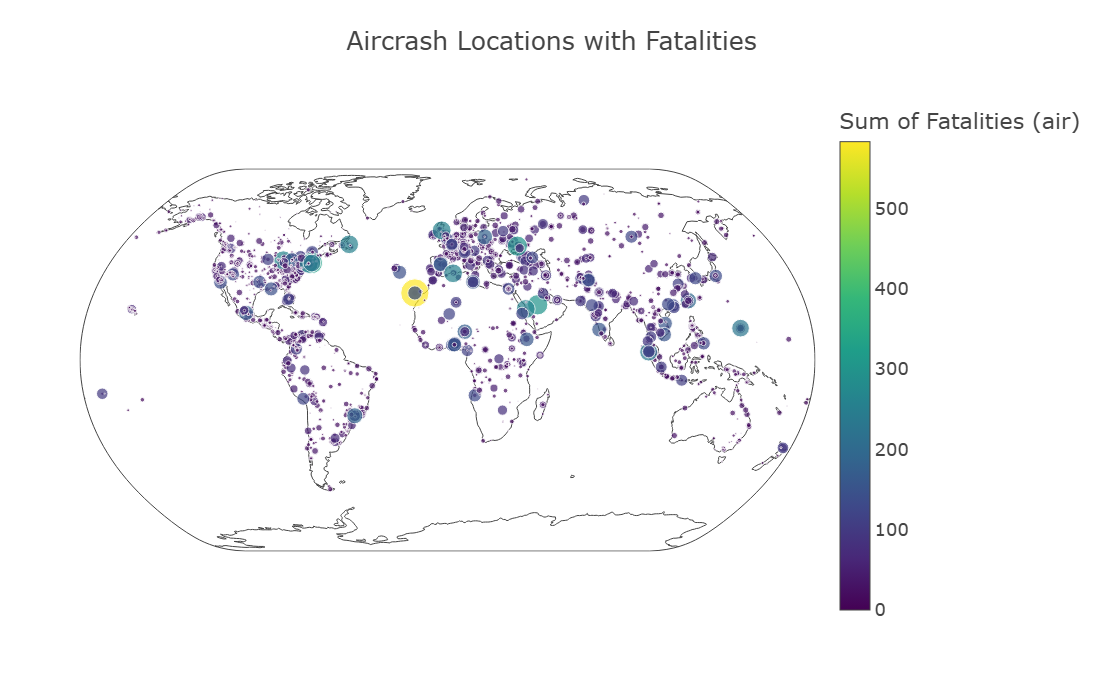

In [17]:
map_df = df.dropna(subset=['Latitude', 'Longitude'])

fig = px.scatter_geo(
    map_df,
    lat='Latitude',
    lon='Longitude',
    hover_name='Aircraft',
    hover_data={
        'Year': True,
        'Operator': True,
        'Sum of Fatalities (air)': True
    },
    color='Sum of Fatalities (air)',
    size='Sum of Fatalities (air)',
    projection='natural earth',
    title='Aircrash Locations with Fatalities',
    template='presentation',
    height=700
)

fig.show()

### Crashes by continent or region (bar or donut)

In [19]:
import pycountry_convert as pc
import pycountry

def get_continent(country_name):
    try:

        if country_name.lower() == 'united states':
            country_name = 'United States of America'
        if country_name.lower() == 'uk':
            country_name = 'United Kingdom'

        country_code = pycountry.countries.lookup(country_name).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_code)

        continent_name = {
            'NA': 'North America',
            'SA': 'South America',
            'AS': 'Asia',
            'AF': 'Africa',
            'OC': 'Oceania',
            'EU': 'Europe',
            'AN': 'Antarctica'
        }[continent_code]

        return continent_name
    except:
        return 'Unknown'


In [20]:
df['Continent'] = df['Country/Region'].apply(get_continent)


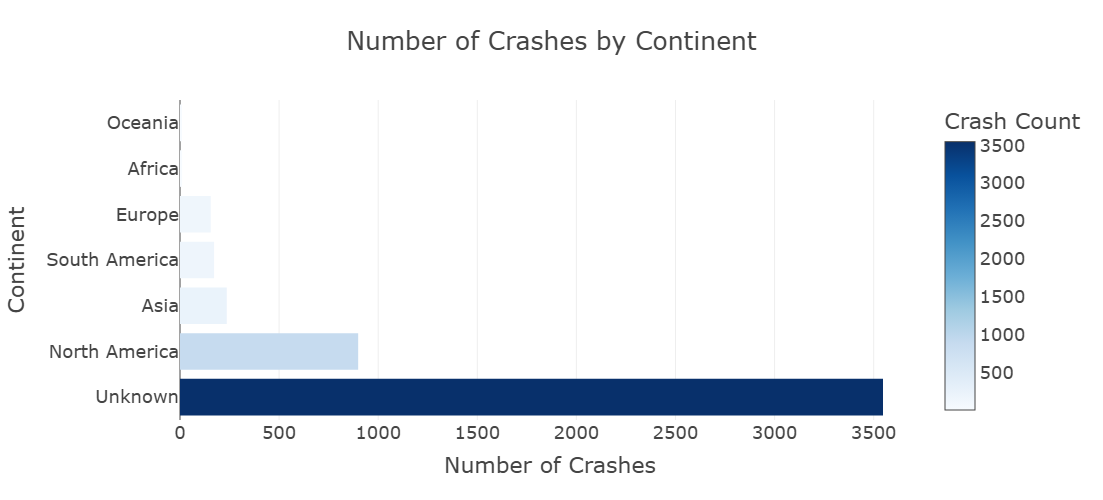

In [22]:
# plot
import plotly.express as px

continent_counts = df['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Crash Count']

fig = px.bar(
    continent_counts,
    x='Crash Count',
    y='Continent',
    orientation='h',
    title='Number of Crashes by Continent',
    template='presentation',
    color='Crash Count',
    color_continuous_scale='Blues',
    height=500
)

fig.update_layout(
    xaxis_title='Number of Crashes',
    yaxis_title='Continent',
    margin=dict(l=180)
)

fig.show()


### Fatalities by continent 

In [23]:
fatalities_by_continent = df.groupby('Continent')['Sum of Fatalities (air)'].sum().reset_index()
fatalities_by_continent.columns = ['Continent', 'Total Fatalities']
fatalities_by_continent = fatalities_by_continent.sort_values('Total Fatalities', ascending=False)


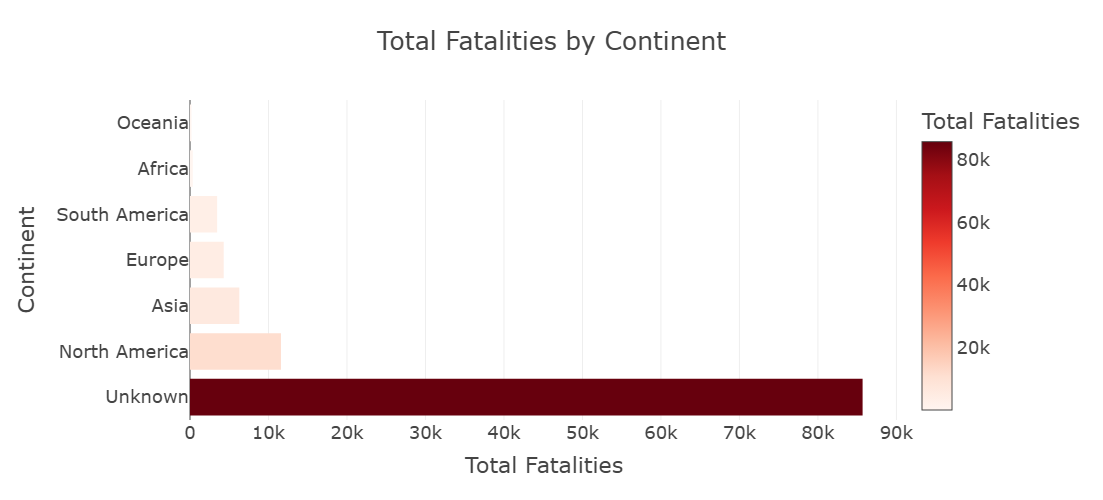

In [25]:
import plotly.express as px

fig = px.bar(
    fatalities_by_continent,
    x='Total Fatalities',
    y='Continent',
    orientation='h',
    title='Total Fatalities by Continent',
    template='presentation',
    color='Total Fatalities',
    color_continuous_scale='Reds',
    height=500
)

fig.update_layout(
    xaxis_title='Total Fatalities',
    yaxis_title='Continent',
    margin=dict(l=190)
)

fig.show()


### Crashes by operator (military, commercial, unknown)

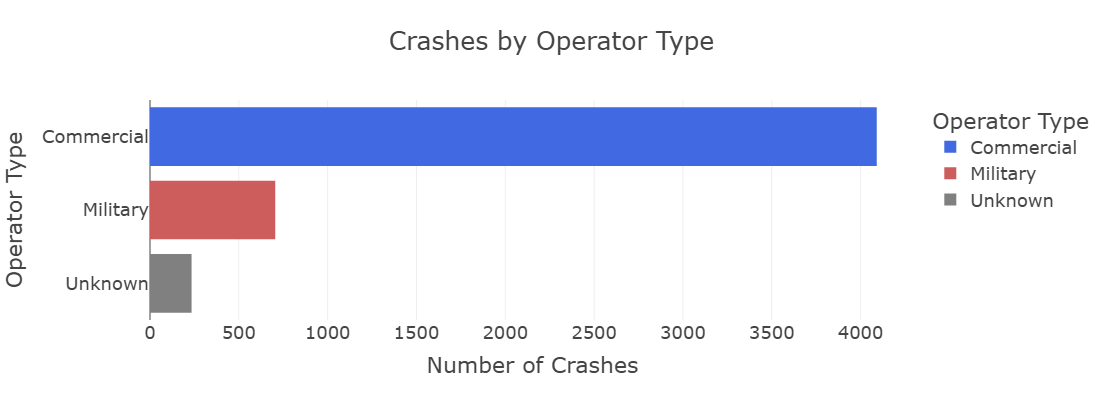

In [26]:
operator_counts = df['Operator Type'].value_counts().reset_index()
operator_counts.columns = ['Operator Type', 'Crash Count']

fig = px.bar(
    operator_counts,
    x='Crash Count',
    y='Operator Type',
    orientation='h',
    title='Crashes by Operator Type',
    template='presentation',
    color='Operator Type',
    color_discrete_map={
        'Military': 'indianred',
        'Commercial': 'royalblue',
        'Unknown': 'gray'
    },
    height=400
)

fig.update_layout(
    xaxis_title='Number of Crashes',
    yaxis_title='Operator Type',
    margin=dict(l=150)
)

fig.show()

### Fatalities per operator

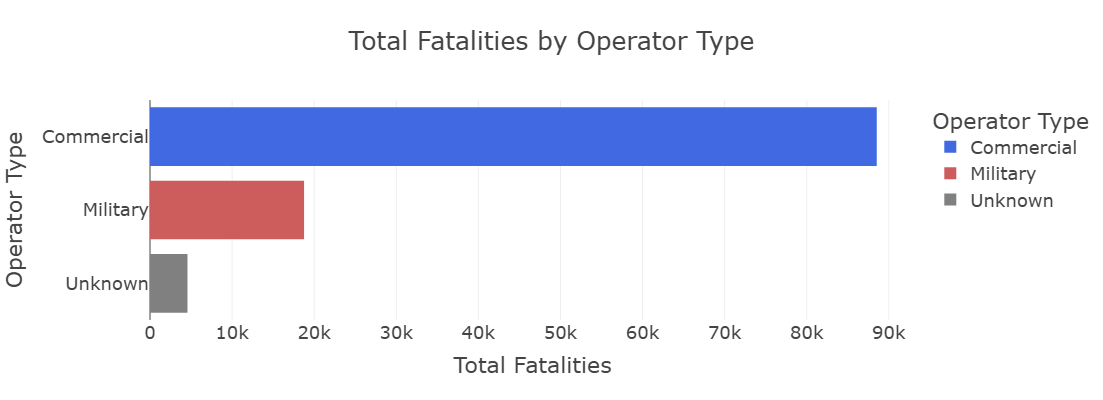

In [27]:
fatalities_by_operator = df.groupby('Operator Type')['Sum of Fatalities (air)'].sum().reset_index()
fatalities_by_operator.columns = ['Operator Type', 'Total Fatalities']
fatalities_by_operator = fatalities_by_operator.sort_values('Total Fatalities', ascending=False)

fig = px.bar(
    fatalities_by_operator,
    x='Total Fatalities',
    y='Operator Type',
    orientation='h',
    title='Total Fatalities by Operator Type',
    template='presentation',
    color='Operator Type',
    color_discrete_map={
        'Military': 'indianred',
        'Commercial': 'royalblue',
        'Unknown': 'gray'
    },
    height=400
)

fig.update_layout(
    xaxis_title='Total Fatalities',
    yaxis_title='Operator Type',
    margin=dict(l=150)
)

fig.show()


### Crashes involving ground deaths

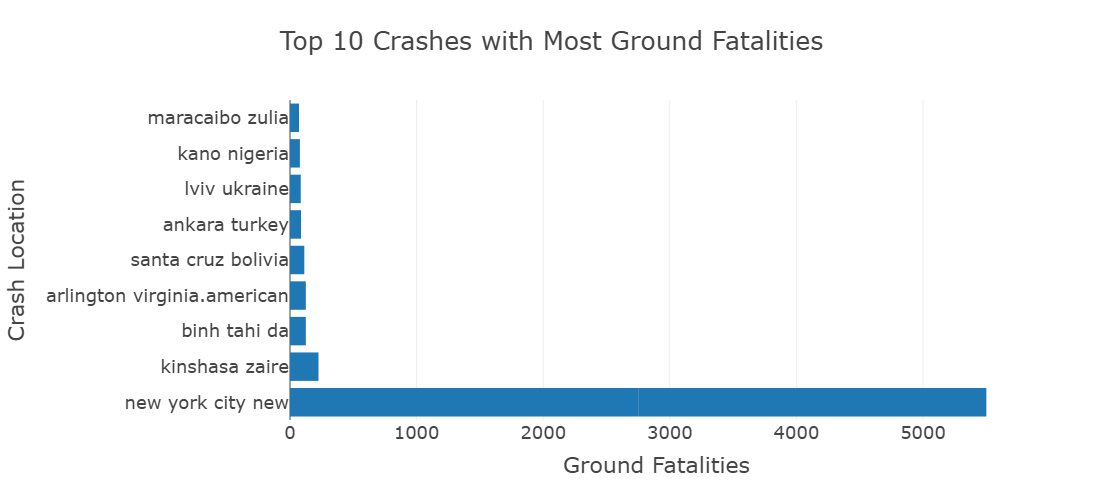

In [31]:
crashes_with_ground_deaths = df[df['Sum of Ground'] > 0].copy()
total_ground_deaths = df['Sum of Ground'].sum()
total_air_deaths = df['Sum of Fatalities (air)'].sum()


top_ground_deaths = crashes_with_ground_deaths.sort_values('Sum of Ground', ascending=False).head(10)

fig = px.bar(
    top_ground_deaths,
    x='Sum of Ground',
    y='Location',
    orientation='h',
    title='Top 10 Crashes with Most Ground Fatalities',
    template='presentation',
    hover_data={
        'Year': True,
        'Aircraft': True,
        'Operator': True,
        'Sum of Fatalities (air)': True,
        'Sum of Aboard': True
    },
    height=500
)

fig.update_layout(
    xaxis_title='Ground Fatalities',
    yaxis_title='Crash Location',
    margin=dict(l=290)
)

fig.show()


# fig.update_layout(template = "presentation",xaxis_title="Age Group",
#                   yaxis_title="percentage of population",
#                   legend_title=dict(text="Income Level"),
#                   xaxis_title_standoff=50,
#                   paper_bgcolor = "rgba(0, 0, 0, 0)",
#                   plot_bgcolor = "rgba(0, 0, 0, 0)"
#                  )

# fig.show()
# fig.write_image(os.path.join(result_dir, 'Income_distribution_by_agegroup_bar_plot.jpg'))
# fig.write_image(os.path.join(results_dir, 'Income_distribution_by_agegroup_bar_plot.png'))
# fig.write_html(os.path.join(result_dir, 'Income_distribution_by_agegroup_bar_plot.html'))

### Most deadly incidents

In [32]:
df['Total Fatalities'] = df['Sum of Fatalities (air)'] + df['Sum of Ground']
top_deadly_crashes = df.sort_values('Total Fatalities', ascending=False).head(10)

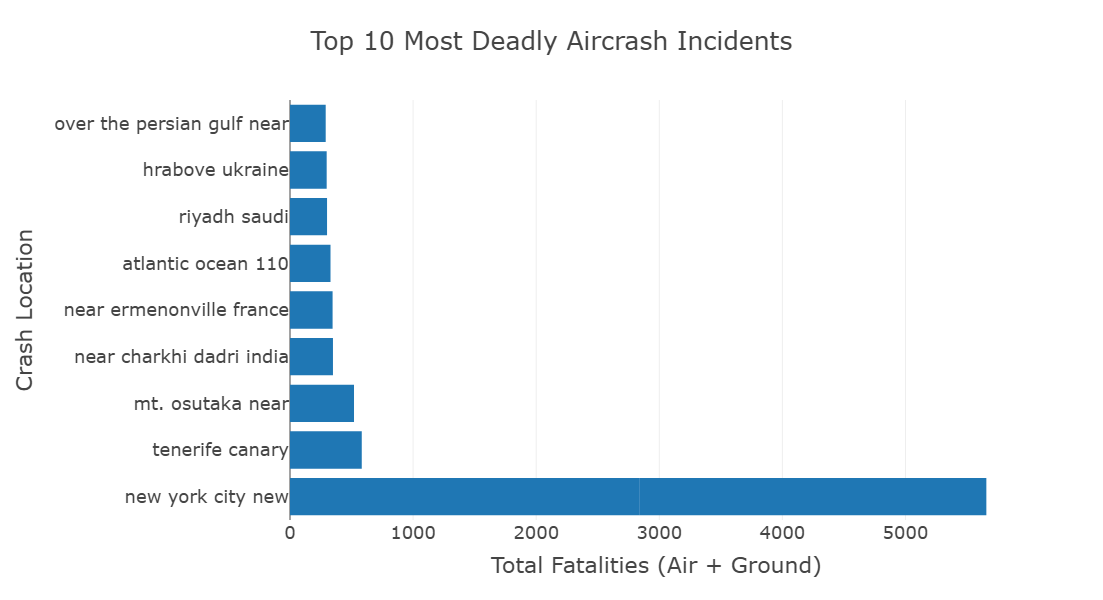

In [34]:
import plotly.express as px

fig = px.bar(
    top_deadly_crashes,
    x='Total Fatalities',
    y='Location',
    orientation='h',
    title='Top 10 Most Deadly Aircrash Incidents',
    template='presentation',
    hover_data={
        'Year': True,
        'Aircraft': True,
        'Operator': True,
        'Sum of Fatalities (air)': True,
        'Sum of Ground': True,
        'Sum of Aboard': True
    },
    height=600
)

fig.update_layout(
    xaxis_title='Total Fatalities (Air + Ground)',
    yaxis_title='Crash Location',
    margin=dict(l=290)
)

fig.show()


### Survival rate

In [35]:
df['Survivors'] = df['Sum of Aboard'] - df['Sum of Fatalities (air)']
df['Survival Rate (%)'] = (df['Survivors'] / df['Sum of Aboard']) * 100
df = df[df['Sum of Aboard'] > 0]


In [36]:
total_aboard = df['Sum of Aboard'].sum()
total_fatalities = df['Sum of Fatalities (air)'].sum()
total_survivors = total_aboard - total_fatalities


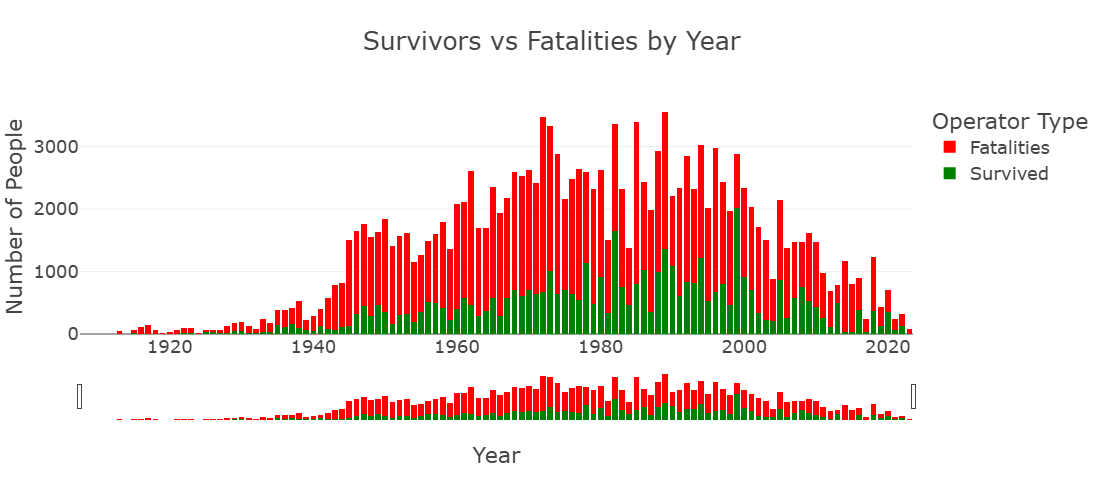

In [43]:
# Group by Year and sum survivors and fatalities
yearly_stats = df.groupby('Year').agg({
    'Survivors': 'sum',
    'Sum of Fatalities (air)': 'sum'
}).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=yearly_stats['Year'],
    y=yearly_stats['Survivors'],
    name='Survived',
    marker_color='green'
))

fig.add_trace(go.Bar(
    x=yearly_stats['Year'],
    y=yearly_stats['Sum of Fatalities (air)'],
    name='Fatalities',
    marker_color='red'
))

fig.update_layout(
    barmode='stack',
    title='Survivors vs Fatalities by Year',
    xaxis_title='Year',
    yaxis_title='Number of People',
    template='presentation',
    height=500
)
fig.update_layout(
    xaxis=dict(
        title='Year',
        rangeslider=dict(visible=True),
        type='linear'
    ),
    yaxis_title='Number of People',
    legend_title='Operator Type'
)
fig.show()


In [44]:
import ipywidgets as widgets
from IPython.display import display

In [47]:
# Year slider (range)
year_slider = widgets.IntRangeSlider(
    value=[df['Year'].min(), df['Year'].max()],
    min=df['Year'].min(),
    max=df['Year'].max(),
    step=1,
    description='Year Range:',
    continuous_update=False,
    layout=widgets.Layout(width='80%')
)

# Region dropdown (multi-select)
region_dropdown = widgets.SelectMultiple(
    options=sorted(df['Location'].unique()),
    value=tuple(sorted(df['Location'].unique())),  # default all selected
    description='Region',
    disabled=False,
    layout=widgets.Layout(width='50%')
)

# Aircraft dropdown (multi-select)
aircraft_dropdown = widgets.SelectMultiple(
    options=sorted(df['Aircraft'].unique()),
    value=tuple(sorted(df['Aircraft'].unique())),  # default all selected
    description='Aircraft',
    disabled=False,
    layout=widgets.Layout(width='50%')
)

def update_plot(year_range, regions, aircrafts):
    # Filter dataframe based on widget selections
    filtered_df = df[
        (df['Year'] >= year_range[0]) & (df['Year'] <= year_range[1]) &
        (df['Location'].isin(regions)) &
        (df['Aircraft'].isin(aircrafts))
    ]
    
    # Example plot: crashes per year stacked by region
    fig = px.bar(
        filtered_df,
        x='Year',
        color='Location	',
        title='Crashes by Year and Region',
        labels={'Location': 'Region', 'count': 'Crashes'},
        template='presentation',
        height=500
    )
    
    fig.update_layout(barmode='stack')
    fig.show()

out = widgets.interactive_output(
    update_plot,
    {
        'year_range': year_slider,
        'regions': region_dropdown,
        'aircrafts': aircraft_dropdown
    }
)

display(year_slider, region_dropdown, aircraft_dropdown, out)

TypeError: '<' not supported between instances of 'float' and 'str'

In [46]:
df

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Sum of Ground,...,Month_num,Date,Operator Type,Latitude,Longitude,Geo Status,Continent,Total Fatalities,Survivors,Survival Rate (%)
0,1908,Qtr 3,September,17,United States,Wright,Wright Flyer III,virginia,Army U.S. - Military,0,...,9,1908-09-17,Military,37.123224,-78.492772,Geocoded,North America,1,1,50.000000
1,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,france,Unknown,0,...,9,1909-09-07,Unknown,46.603354,1.888334,Geocoded,Europe,1,0,0.000000
2,1912,Qtr 3,July,12,Unknown,Unknown,Dirigible,atlantic,Navy U.S. - JerseyMilitary,0,...,7,1912-07-12,Military,39.514327,-74.663288,Geocoded,Unknown,5,0,0.000000
3,1913,Qtr 3,August,6,United Kingdom,Curtiss,Curtiss seaplane,victoria british,Canada Columbia Private,0,...,8,1913-08-06,Commercial,48.428318,-123.364953,Geocoded,Europe,1,0,0.000000
4,1913,Qtr 3,September,9,Unknown,Zeppelin,Zeppelin L 1 (airship),over the north seamilitary - german navy,Unknown,0,...,9,1913-09-09,Unknown,NaN,NaN,Unknown,Unknown,14,6,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025,2022,Qtr 4,November,6,Unknown,ATR,ATR 42 5005H,tanzania,Air Precision,0,...,11,2022-11-06,Commercial,-6.524712,35.787844,Geocoded,Unknown,19,24,55.813953
5026,2022,Qtr 4,November,18,Unknown,Airbus,Airbus 320 271NCC,lima peru,LATAM,2,...,11,2022-11-18,Commercial,-23.533202,-46.664233,Geocoded,Unknown,2,108,100.000000
5027,2022,Qtr 4,November,21,Unknown,Piper,Piper PA 31,medellín colombia,SAS Aero,0,...,11,2022-11-21,Commercial,6.269732,-75.602560,Geocoded,Unknown,8,0,0.000000
5028,2023,Qtr 1,January,15,Unknown,ATR,ATR 72 500,pokhara nepal,Airlines Yeti,0,...,1,2023-01-15,Commercial,28.209538,83.991402,Geocoded,Unknown,72,0,0.000000
